### 영화 추천 시스템
1. Demographic Filtering (인구통계학적 필터링)
    - 많은 사람들이 `일반적으로` 좋아하는
2. Content Based Filtering (컨텐츠 기반 필터링)
    - 특정 아이템을 기반한 `유사한` 영화
    - `유사한`: 줄거리, 장르, 감독, 주연배우, 시대적 배경 등
3. Collaborative Filtering (협업 필터링)
    - `취향`이 비슷한 사람 (이력 기반)

##### Setting

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [50]:
credit = pd.read_csv('tmdb_5000_credits.csv')
movie = pd.read_csv('tmdb_5000_movies.csv')

In [51]:
credit.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


- cast - The name of lead and supporting actors.
- crew - The name of Director, Editor, Composer, Writer etc.

In [52]:
movie.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


- vote_average - average ratings the movie recieved.
- vote_count - the count of votes recieved.

- 공유하는 key
    - (credit)`movie_id`, (movie)`id`
    - title

In [53]:
# 동일한 shape 임을 확인
print(credit.shape, movie.shape)

(4803, 4) (4803, 20)


In [54]:
# title column 이 동일한지 확인
credit.title.equals(movie.title)

True

$\rightarrow$ credit 의 title 을 제거 후 두 table 을 merge

In [55]:
credit = credit.rename(columns={'movie_id': 'id'})
credit = credit.drop(columns='title')

In [56]:
# 서로 다른 column 명으로 테이블에 존재하는 경우
df = pd.merge(movie, credit, on='id')
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


- 맨 뒤쪽에 합쳐진 columns(**cast**, **crew** 확인)

#### Demographic Filtering

##### Reliability
1. 평점 10, 평가자 수 5
2. 평점  8, 평가자 수 500

$\rightarrow$ 어떤 영화의 평점 신뢰성이 높은가? 우리는 적절한 점수 지표가 필요하다.

[영화 점수 산정 방식 - 나무위키](https://namu.wiki/w/IMDb%20Top%20250)

$W = \frac{vR + mC}{v + m}$
- W: 가중 평점
- v: 해당 영화의 총 투표수 -> vote_count
- m: 신뢰성을 위한 최소한의 투표 수 -> ??
- R: 해당 영화의 평균 평점 -> vote_average
- C: IMDb에 있는 모든 영화의 평균 평점(현재 7.0점)

In [35]:
# 영화의 평균 평점
C = df.vote_average.mean()
C

6.092171559442016

In [36]:
# m 신뢰성을 위한 최소한의 투표 수 구하기
df.vote_count.describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

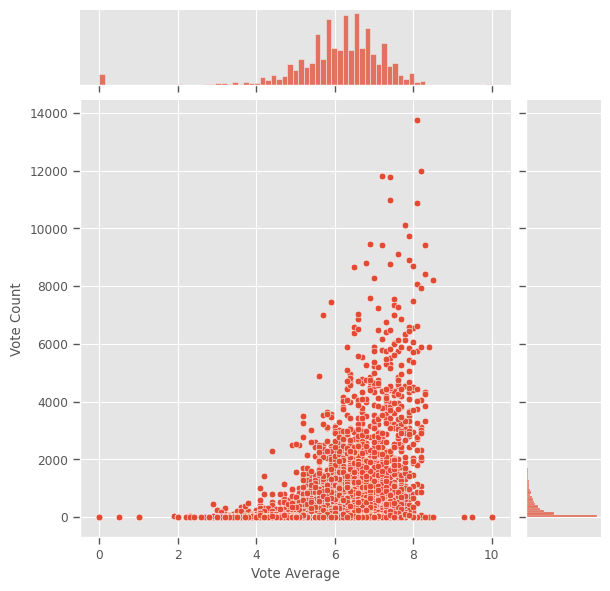

In [37]:
sns.set_context('paper')
ax = sns.jointplot(data=df, x='vote_average', y='vote_count', kind='scatter')
ax.set_axis_labels("Vote Average", "Vote Count")

- 최대값이 13752 인 것에 비해 평균이 매우 작은 것을 확인할 수 있다.
    - 이에 따라 분산이 매우 크다.
    - Vote Count 는 Positive skew 형태의 분포를 형성한다.
- Vote Count 의 밀집 구간을 벗어나기 시작하는 2000을 최소한의 투표수로 선정한다.

In [38]:
# 전체 데이터 4803 중 433 은 상위 약 9% 를 차지하고 있다.
df[df.vote_count >= 2000].shape

(433, 22)

In [39]:
# 2000 이상의 평가를 받은 영화의 data frame 을 생성한다.
top_movie = df.copy().loc[df['vote_count'] >= 2000].reset_index()
top_movie.vote_count.sort_values()

397     2005
199     2008
193     2010
213     2023
303     2025
       ...  
265    10995
14     11776
0      11800
58     12002
79     13752
Name: vote_count, Length: 433, dtype: int64

In [40]:
# 선정된 영화에 대한 점수 계산
def movie_score(x, m=2000, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return round((v*R + m*C) / (v+m), 2)

top_movie['score'] = top_movie.apply(movie_score, axis=1)

In [41]:
top_movie.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,score
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.04
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.65
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.24


In [42]:
top_10 = top_movie.sort_values('score', ascending=False).loc[:, ['title', 'vote_count', 'vote_average', 'score']].head(10)
top_10

,title,vote_count,vote_average,score
349,The Shawshank Redemption,8205,8.5,8.03
252,Fight Club,9413,8.3,7.91
58,The Dark Knight,12002,8.2,7.90
409,Pulp Fiction,8428,8.3,7.88
79,Inception,13752,8.1,7.85
414,The Godfather,5893,8.4,7.82
78,Interstellar,10867,8.1,7.79
267,Forrest Gump,7927,8.2,7.78
185,The Lord of the Rings: The Return of the King,8064,8.1,7.70
351,The Empire Strikes Back,5879,8.2,7.66


#### Content Based Filtering

In [43]:
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


##### Overview(줄거리)
- 텍스트 분석을 통한 추천

- `BOW(Bag Of Words)` : 텍스트에 포함된 단어가 몇 번 등장하였는가 (순서 상관 없음)
    - 문장에 나온 단어를 feature 로 설정한다.
    - 문장(row) 마다 나온 단어의 개수를 integer 로 기록한다.
    - 문서 100개, 모든 문서에서 나온 단어 10,000 개가 된다면 100 x 10,000 matrix 가 만들어진다.
    - `CountVectorizer`: 다 센다
    - `TfidfVectorizer`: 'I', 'be', 'a' 등 다른 문서에도 비슷하게 등장한다면 중요하게 볼 수 없어서 penalty 를 준다. (Column 개수가 줄어들겠죠)
    

In [44]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [45]:
df['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [57]:
df['overview'].isnull().values.any()

True

In [58]:
df.overview = df.overview.fillna('')

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english') # ENGLISH_STOP_WORDS 단어들이 제외된다.
tfidf_matrix = tfidf.fit_transform(df['overview'])
tfidf_matrix.shape

(4803, 20978)

In [60]:
tfidf_matrix # 125840 개의 0 이 아닌 데이터가 존재한다.

<4803x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 125840 stored elements in Compressed Sparse Row format>

`단어의 유사도 판단` -> `Cosine Distance`

In [62]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarity = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_similarity.shape

(4803, 4803)

In [63]:
indices = pd.Series(df.index, index = df.title).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [64]:
indices['The Dark Knight Rises']

3

In [65]:
df.iloc[[indices['The Dark Knight Rises']]]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.31295,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."


In [110]:
# 영화의 제목을 입력 받으면 코사인 유사도를 통해 가장 유사도가 높은 상위 10개의 영화 목록 반환.
def get_recommandations(title, cs=cosine_similarity):
    movie_idx = indices[title]
    similarity_scores = list(enumerate(cs[movie_idx]))
    recommanded_movies_idx = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:11]
    print(recommanded_movies_idx)
    titles = []
    for i, _ in recommanded_movies_idx:
        titles.append(df['title'].iloc[i])
    return titles

In [75]:
get_recommandations('The Avengers')

['Avengers: Age of Ultron',
 'Plastic',
 'Timecop',
 'This Thing of Ours',
 'Thank You for Smoking',
 'The Corruptor',
 'Wall Street: Money Never Sleeps',
 'Team America: World Police',
 'The Fountain',
 'Snowpiercer']

##### 다양한 요소 기반 추천 (장르, 감독, 키워드 등)

In [79]:
df[['genres', 'keywords', 'cast', 'crew']].head()

,genres,keywords,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [81]:
type(df.loc[0, 'genres'])

str

In [82]:
from ast import literal_eval
features = ['genres', 'keywords', 'cast', 'crew']
for feature in features:
    df[feature] = df[feature].apply(literal_eval)

In [85]:
df.loc[0, 'crew']

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [86]:
# 감독 정보 추출
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

df['director'] = df['crew'].apply(get_director)

In [88]:
df['director'].isnull().values.any()

True

In [91]:
# First third charactor is most important
df.loc[0, 'cast']

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [93]:
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        if len(names) > 3:
            names = names[:3]
        return names
    return [] # 예상하지 못한 데이터

In [94]:
features = ['cast', 'keywords', 'genres']
for feature in features:
    df[feature] = df[feature].apply(get_list)

In [96]:
df[['title', 'cast', 'director', 'genres', 'keywords']].head()

,title,cast,director,genres,keywords
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[Action, Adventure, Fantasy]","[culture clash, future, space war]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[Action, Adventure, Crime]","[spy, based on novel, secret agent]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[Action, Crime, Drama]","[dc comics, crime fighter, terrorist]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion]"


In [97]:
# 벡터화를 할 때 공백이 구분됨 -> 띄어쓰기 삭제
# 모두 소문자로 변경
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(' ', '')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(' ', ''))
        else:
            return ''

In [98]:
features = ['cast', 'keywords', 'genres', 'director']
for feature in features:
    df[feature] = df[feature].apply(clean_data)

In [99]:
df[['title', 'cast', 'director', 'genres', 'keywords']].head()

,title,cast,director,genres,keywords
0,Avatar,"[samworthington, zoesaldana, sigourneyweaver]",jamescameron,"[action, adventure, fantasy]","[cultureclash, future, spacewar]"
1,Pirates of the Caribbean: At World's End,"[johnnydepp, orlandobloom, keiraknightley]",goreverbinski,"[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]"
2,Spectre,"[danielcraig, christophwaltz, léaseydoux]",sammendes,"[action, adventure, crime]","[spy, basedonnovel, secretagent]"
3,The Dark Knight Rises,"[christianbale, michaelcaine, garyoldman]",christophernolan,"[action, crime, drama]","[dccomics, crimefighter, terrorist]"
4,John Carter,"[taylorkitsch, lynncollins, samanthamorton]",andrewstanton,"[action, adventure, sciencefiction]","[basedonnovel, mars, medallion]"


In [100]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + ' '.join(x['genres']) + ' ' + x['director']

df['soup'] = df.apply(create_soup, axis=1)
df['soup']

0       cultureclash future spacewar samworthington zo...
1       ocean drugabuse exoticisland johnnydepp orland...
2       spy basedonnovel secretagent danielcraig chris...
3       dccomics crimefighter terrorist christianbale ...
4       basedonnovel mars medallion taylorkitsch lynnc...
                              ...                        
4798    unitedstates–mexicobarrier legs arms carlosgal...
4799     edwardburns kerrybishé marshadietlein comedy ...
4800    date loveatfirstsight narration ericmabius kri...
4801       danielhenney elizacoupe billpaxton  danielhsia
4802    obsession camcorder crush drewbarrymore brianh...
Name: soup, Length: 4803, dtype: object

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df['soup'])
count_matrix

<4803x11520 sparse matrix of type '<class 'numpy.int64'>'
	with 42935 stored elements in Compressed Sparse Row format>

In [102]:
from sklearn.metrics.pairwise import cosine_similarity
consine_sim = cosine_similarity(count_matrix, count_matrix)
consine_sim

array([[1. , 0.3, 0.2, ..., 0. , 0. , 0. ],
       [0.3, 1. , 0.2, ..., 0. , 0. , 0. ],
       [0.2, 0.2, 1. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 1. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 1. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 1. ]])

In [104]:
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [112]:
get_recommandations('The Dark Knight Rises', consine_sim)

[(65, 0.7), (119, 0.7), (4638, 0.5477225575051663), (1196, 0.4), (3073, 0.4), (3326, 0.3585685828003181), (1503, 0.33541019662496846), (1986, 0.33541019662496846), (303, 0.31622776601683794), (747, 0.31622776601683794)]


['The Dark Knight',
 'Batman Begins',
 "Amidst the Devil's Wings",
 'The Prestige',
 'Romeo Is Bleeding',
 'Black November',
 'Takers',
 'Faster',
 'Catwoman',
 'Gangster Squad']

In [111]:
get_recommandations('The Martian', consine_sim)

[(4, 0.4), (95, 0.4), (365, 0.4), (256, 0.31622776601683794), (1326, 0.31622776601683794), (1958, 0.31622776601683794), (3043, 0.31622776601683794), (3373, 0.31622776601683794), (3392, 0.31622776601683794), (3698, 0.31622776601683794)]


['John Carter',
 'Interstellar',
 'Contact',
 'Allegiant',
 'The 5th Wave',
 'On the Road',
 'End of the Spear',
 'The Other Side of Heaven',
 'Gerry',
 'Moby Dick']

#### Collaborative filtering (리뷰, 사용자의 평가, 구매 등 기반)

[Surprise_Library](https://surpriselib.com/)

In [113]:
import surprise
surprise.__version__

'1.1.3'

In [115]:
ratings = pd.read_csv('./ratings_small.csv')
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [118]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [116]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

`Reader`

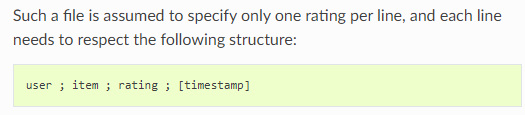

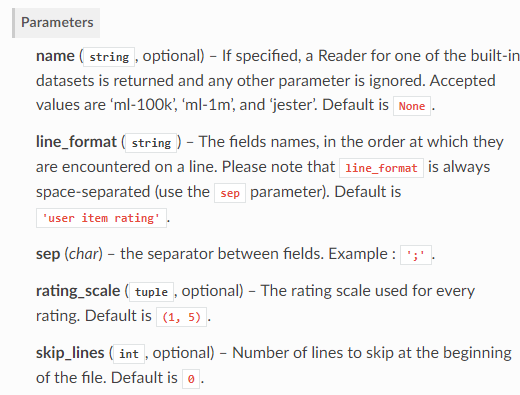

In [119]:
ratings['rating'].describe()

count    100004.000000
mean          3.543608
std           1.058064
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [121]:
reader = Reader(rating_scale=(0.5, 5))

In [122]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
data

In [124]:
svd = SVD(random_state=0)

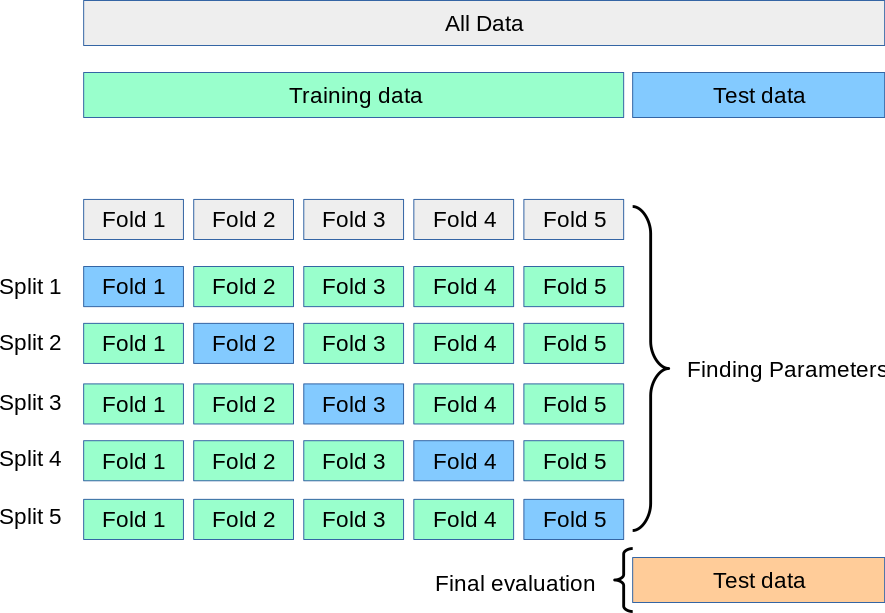

In [125]:
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8951  0.9028  0.8962  0.8953  0.8984  0.8975  0.0029  
MAE (testset)     0.6899  0.6947  0.6908  0.6902  0.6883  0.6908  0.0021  
Fit time          0.80    0.79    0.78    0.81    0.84    0.80    0.02    
Test time         0.14    0.11    0.11    0.11    0.11    0.11    0.01    


{'test_rmse': array([0.89510266, 0.90276874, 0.89616437, 0.89528632, 0.89839424]),
 'test_mae': array([0.68991453, 0.69471955, 0.69076627, 0.6901922 , 0.68833147]),
 'fit_time': (0.8011536598205566,
  0.7868437767028809,
  0.7805211544036865,
  0.812096357345581,
  0.8384637832641602),
 'test_time': (0.13703083992004395,
  0.10750913619995117,
  0.10602426528930664,
  0.11402535438537598,
  0.10802602767944336)}

In [126]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [129]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [131]:
print(svd.predict(1, 302)) # 실제 평가 ?, 예측 평가 2.71
print(svd.predict(1, 1029, 3)) # 실제 평가 3, 예측 평가 2.88

user: 1          item: 302        r_ui = None   est = 2.71   {'was_impossible': False}
user: 1          item: 1029       r_ui = 3.00   est = 2.88   {'was_impossible': False}


In [132]:
ratings[ratings['movieId']==1]

,userId,movieId,rating,timestamp
495,7,1,3.0,851866703
699,9,1,4.0,938629179
889,13,1,5.0,1331380058
962,15,1,2.0,997938310
3105,19,1,3.0,855190091
...,...,...,...,...
98531,660,1,2.5,1436680062
98714,663,1,4.0,1438397999
98740,664,1,3.5,1362421730
99858,670,1,4.0,938782344
